In [3]:
import pandas as pd
import re
import ast
import datetime

#from dotenv import load_dotenv
import requests
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#NLTK
import nltk
from nltk import word_tokenize, pos_tag



from scipy.spatial.distance import pdist, squareform

%matplotlib inline
#load_dotenv()

In [4]:
ratings = pd.read_csv('./input/ratings_small.csv')

In [27]:
g_movieid = ratings.groupby('movieId')

In [26]:
ratings_matrix = ratings.pivot_table(index='movieId', values='rating', columns='userId')
ratings_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
distances = pdist(ratings_matrix.T, 'euclidean')

In [28]:
squareform(pdist(ratings_matrix.T, 'euclidean'))

array([[ 0., nan, nan, ..., nan, nan, nan],
       [nan,  0., nan, ..., nan, nan, nan],
       [nan, nan,  0., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ...,  0., nan, nan],
       [nan, nan, nan, ..., nan,  0., nan],
       [nan, nan, nan, ..., nan, nan,  0.]])

In [24]:
distances = pd.DataFrame(1/(1 + squareform(pdist(ratings_matrix.T, 'euclidean'))), 
index=ratings_matrix.columns, columns=ratings_matrix.columns)

In [25]:
distances

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [158]:
#Loading the movies_metadata and convert "id" column to "int32".
metadata = pd.read_csv('./input/movies_metadata.csv', low_memory=False, dtype={'id':'str'})
metadata['id'] = metadata['id'].apply(lambda x: re.sub(r'\d+\-\d+\-\d+', "0", x))
metadata['id'] = metadata['id'].astype("int32")

In [159]:
#Loading the id links between metadata and ratings
links = pd.read_csv('./input/links.csv', index_col='movieId')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [10]:
ratings.groupby('userId').count()

,movieId,rating,timestamp
userId,,,
1,20,20,20
2,76,76,76
3,51,51,51
4,204,204,204
5,100,100,100
...,...,...,...
667,68,68,68
668,20,20,20
669,37,37,37


In [14]:
users_rating = g_userid['movieId'].count().reset_index()

In [26]:
ratings = ratings.merge(users_rating, left_on='userId', right_on='userId')

In [36]:
ratings = ratings.loc[ratings['movieId_y'] > 50]
ratings = ratings.loc[ratings['movieId_y'] < 500]

In [37]:
ratings.shape

(58576, 5)

In [161]:
links.head()

,imdbId,tmdbId
movieId,,
1,114709,862.0
2,113497,8844.0
3,113228,15602.0
4,114885,31357.0
5,113041,11862.0


In [162]:
metadata = metadata.merge(links['tmdbId'], how='left', left_on='id', right_on=links.index)

In [140]:
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,tmdbId
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,88224.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,42164.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN


In [9]:
metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                         int32
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [10]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [11]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [12]:
ratings.shape

(100004, 4)

# Grouping by userid

In [13]:
ratings['date'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [20]:
ratings['weekday'] = ratings['timestamp'].apply(lambda x: pd.Timestamp(x).dayofweek)
# returns datetime objects
#ratings['weekday'] = ratings['timestamp'].apply(lambda row: dt.datetime(row.year, row.month, row.day, row.hour))
# Create a DatetimeIndex and assign it to the dataframe.
#ratings.index = pd.DatetimeIndex(ratings.date)

In [21]:
ratings

,userId,movieId,rating,timestamp,weekday
0,1,31,2.5,1260759144,3
1,1,1029,3.0,1260759179,3
2,1,1061,3.0,1260759182,3
3,1,1129,2.0,1260759185,3
4,1,1172,4.0,1260759205,3
...,...,...,...,...,...
99999,671,6268,2.5,1065579370,3
100000,671,6269,4.0,1065149201,3
100001,671,6365,4.0,1070940363,3
100002,671,6385,2.5,1070979663,3


# Users Clustering by movies keywords

In [16]:
ratings.head()

,userId,movieId,rating,timestamp,date
0,1,31,2.5,1260759144,2009-12-14 02:52:24
1,1,1029,3.0,1260759179,2009-12-14 02:52:59
2,1,1061,3.0,1260759182,2009-12-14 02:53:02
3,1,1129,2.0,1260759185,2009-12-14 02:53:05
4,1,1172,4.0,1260759205,2009-12-14 02:53:25


In [163]:
movies = ratings['movieId'].unique()

In [164]:
movies.shape

(9066,)

In [165]:
ratings['movieId'].value_counts().head()

356    341
296    324
318    311
593    304
260    291
Name: movieId, dtype: int64

In [20]:
def processOverview(overview):
    valid_tags = ["JJ","JJR","JJS","NN","NNS"]
    tokens = [item for item, tag in pos_tag(word_tokenize(overview)) if tag in valid_tags]
    return tokens

metadata['keywords'] = metadata['overview'].apply(lambda x: processOverview(str(x)))

In [22]:
keywords = []
for movie in metadata['keywords']:
    for word in movie:
        keywords.append(word)
    

In [26]:
print(len(keywords))
print(len(set(keywords)))
len(keywords)/len(set(keywords))

770605
46129


16.705434759045286

# Extract Features from Ratings file

In [27]:
ratings.head()

,userId,movieId,rating,timestamp,date
0,1,31,2.5,1260759144,2009-12-14 02:52:24
1,1,1029,3.0,1260759179,2009-12-14 02:52:59
2,1,1061,3.0,1260759182,2009-12-14 02:53:02
3,1,1129,2.0,1260759185,2009-12-14 02:53:05
4,1,1172,4.0,1260759205,2009-12-14 02:53:25


In [43]:
g_userid = ratings.groupby('userId')
user_ratings_mean = g_userid.rating.mean()
features = ratings.merge(user_ratings_mean, left_on='userId', right_on=user_ratings_mean.index)

In [44]:
g_movieid = ratings.groupby('movieId')
movie_ratings_mean = g_movieid.rating.mean()
features = features.merge(movie_ratings_mean, left_on='movieId', right_on=movie_ratings_mean.index)

In [45]:
#Columns renaming
features.rename(columns={'rating_x':'rating', 'rating_y':'mean_rt_user', 'rating':'mean_rt_movie'}, inplace=True)

In [31]:
features.head()

,userId,movieId,rating,timestamp,date,mean_rt_user,mean_rt_movie
0,1,31,2.5,1260759144,2009-12-14 02:52:24,2.550000,3.178571
1,7,31,3.0,851868750,1996-12-29 14:12:30,3.465909,3.178571
2,31,31,4.0,1273541953,2010-05-11 01:39:13,4.166667,3.178571
3,32,31,4.0,834828440,1996-06-15 08:47:20,3.666667,3.178571
4,36,31,3.0,847057202,1996-11-03 21:40:02,3.615385,3.178571


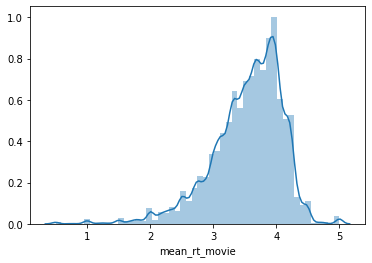

In [32]:
sns.distplot(features['mean_rt_movie'])

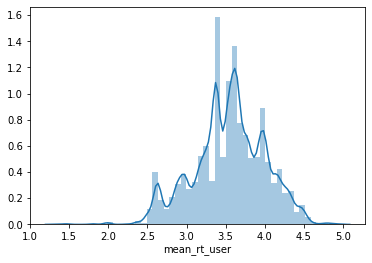

In [33]:
#Distribution of ratings per user. Close to normal.
sns.distplot(features['mean_rt_user'])

# Extract Genres from Metadata

In [141]:
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,tmdbId
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,88224.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,42164.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN


In [35]:
metadata.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
keywords                     0
dtype: int64

In [166]:
#Transform the column "genres" from Metadata into an array with only the names of the genres.
def getGenres(row):
    genres = [dct['name'] for dct in row]
    return genres

metadata['genres'] = metadata['genres'].apply(lambda x: getGenres(ast.literal_eval(x)))


In [66]:
#Merge the genres column into the Features dataframe.
features = features.merge(metadata['genres'], how='left', left_on="tmdbId", right_on=metadata['id'])

In [167]:
    genres = metadata[['id', 'genres']]

,id,genres
0,862,"[Animation, Comedy, Family]"
1,8844,"[Adventure, Fantasy, Family]"
2,15602,"[Romance, Comedy]"
3,31357,"[Comedy, Drama, Romance]"
4,11862,[Comedy]
...,...,...
45461,439050,"[Drama, Family]"
45462,111109,[Drama]
45463,67758,"[Action, Drama, Thriller]"
45464,227506,[]


# Get Dummies of Genres column

In [169]:
genres_dummies = genres.join(genres['genres'].str.join('|').str.get_dummies().add_prefix('dummy_name_'))

In [171]:
genres_dummies.drop("genres", axis=1, inplace=True)

In [173]:
genres_dummies.set_index('id')

,dummy_name_Action,dummy_name_Adventure,dummy_name_Animation,dummy_name_Aniplex,dummy_name_BROSTA TV,dummy_name_Carousel Productions,dummy_name_Comedy,dummy_name_Crime,dummy_name_Documentary,dummy_name_Drama,...,dummy_name_Romance,dummy_name_Science Fiction,dummy_name_Sentai Filmworks,dummy_name_TV Movie,dummy_name_Telescene Film Group Productions,dummy_name_The Cartel,dummy_name_Thriller,dummy_name_Vision View Entertainment,dummy_name_War,dummy_name_Western
id,,,,,,,,,,,,,,,,,,,,,
862,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8844,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15602,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
31357,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
11862,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
111109,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
67758,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [80]:
g_userid = features.groupby('userId')

In [81]:
features.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'date', 'imdbId', 'tmdbId',
       'genres', 'dummy_name_Action', 'dummy_name_Adventure',
       'dummy_name_Animation', 'dummy_name_Comedy', 'dummy_name_Crime',
       'dummy_name_Documentary', 'dummy_name_Drama', 'dummy_name_Family',
       'dummy_name_Fantasy', 'dummy_name_Foreign', 'dummy_name_History',
       'dummy_name_Horror', 'dummy_name_Music', 'dummy_name_Mystery',
       'dummy_name_Romance', 'dummy_name_Science Fiction',
       'dummy_name_TV Movie', 'dummy_name_Thriller', 'dummy_name_War',
       'dummy_name_Western'],
      dtype='object')

In [85]:
users_by_genres = g_userid['dummy_name_Action', 'dummy_name_Adventure',
       'dummy_name_Animation', 'dummy_name_Comedy', 'dummy_name_Crime',
       'dummy_name_Documentary', 'dummy_name_Drama', 'dummy_name_Family',
       'dummy_name_Fantasy', 'dummy_name_Foreign', 'dummy_name_History',
       'dummy_name_Horror', 'dummy_name_Music', 'dummy_name_Mystery',
       'dummy_name_Romance', 'dummy_name_Science Fiction',
       'dummy_name_TV Movie', 'dummy_name_Thriller', 'dummy_name_War',
       'dummy_name_Western'].sum()

In [102]:
# Normalize: Divide the dummies by the total number of genre tags. 
users_by_genres = users_by_genres.apply(lambda x: x/users_by_genres.sum(axis=1))
users_by_genres.head()

,dummy_name_Action,dummy_name_Adventure,dummy_name_Animation,dummy_name_Comedy,dummy_name_Crime,dummy_name_Documentary,dummy_name_Drama,dummy_name_Family,dummy_name_Fantasy,dummy_name_Foreign,dummy_name_History,dummy_name_Horror,dummy_name_Music,dummy_name_Mystery,dummy_name_Romance,dummy_name_Science Fiction,dummy_name_TV Movie,dummy_name_Thriller,dummy_name_War,dummy_name_Western
userId,,,,,,,,,,,,,,,,,,,,
1,0.115385,0.115385,0.057692,0.096154,0.076923,0.000000,0.134615,0.057692,0.019231,0.0,0.038462,0.038462,0.000000,0.019231,0.038462,0.096154,0.0,0.057692,0.019231,0.019231
2,0.082949,0.059908,0.023041,0.129032,0.064516,0.000000,0.207373,0.069124,0.055300,0.0,0.023041,0.009217,0.004608,0.036866,0.110599,0.023041,0.0,0.082949,0.013825,0.004608
3,0.090278,0.090278,0.027778,0.097222,0.076389,0.013889,0.194444,0.055556,0.083333,0.0,0.027778,0.013889,0.013889,0.013889,0.062500,0.027778,0.0,0.069444,0.034722,0.006944
4,0.091068,0.117338,0.043783,0.141856,0.059545,0.003503,0.098074,0.078809,0.071804,0.0,0.005254,0.035026,0.017513,0.022767,0.043783,0.075306,0.0,0.087566,0.005254,0.001751
5,0.040984,0.057377,0.040984,0.213115,0.053279,0.008197,0.180328,0.073770,0.061475,0.0,0.008197,0.012295,0.020492,0.016393,0.131148,0.020492,0.0,0.049180,0.012295,0.000000


In [104]:
users_by_genres.to_csv("./output/users_by_genres_small.csv")

,id,genres
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,"[{'id': 35, 'name': 'Comedy'}]"
...,...,...
45461,439050,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n..."
45462,111109,"[{'id': 18, 'name': 'Drama'}]"
45463,67758,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
45464,227506,[]


In [129]:
metadata.head

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,movieId,imdbId,tmdbId_x,tmdbId_y
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,862.0,116985.0,88224.0,88224.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,8844.0,78763.0,42164.0,42164.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,NaN,NaN,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,NaN,NaN,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,NaN,NaN,NaN


# Supervised by genres and rating

In [1]:
import pandas as pd
import src.mongodb_database as mdb
import api

/home/castares/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/castares/.local/lib/python3.6/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DummyRegressor from version 0.21.3 when using version 0.22. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/castares/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be impor

In [2]:
api.buildDataframe(49)

,user_avg_rating,movieId,movie_avg_rating,popularity,cluster,Action,Adventure,Animation,Aniplex,BROSTA TV,...,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,0.814112,3,0.646779,15497,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.814112,5,0.619731,15258,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.814112,6,0.834515,27895,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.814112,11,0.783462,19475,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.814112,12,0.504932,4475,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,0.814112,141950,0.700127,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3537,0.814112,142115,0.940523,273,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3538,0.814112,158238,0.798604,1738,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3539,0.814112,163937,0.444832,146,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
X, metadata = api.testrecommender(49)

In [18]:
results = []
for e in metadata:
    result = {
        "id": e['id'],
        'name': e['original_title'],
        'overview': e['overview'],
        'predicted rating': float(X['prediction'].loc[X['movieId'] == e['id']])
    }
    results.append(result)

In [19]:
results

[{'id': 922,
  'name': 'Dead Man',
  'overview': 'On the run after murdering a man, accountant William Blake encounters a strange North American man named Nobody who prepares him for his journey into the spiritual world.',
  'predicted rating': 4.651163569768474},
 {'id': 745,
  'name': 'The Sixth Sense',
  'overview': 'A psychological thriller about an eight year old boy named Cole Sear who believes he can see into the world of the dead. A child psychologist named Malcolm Crowe comes to Cole to help him deal with his problem, learning that he really can see ghosts of dead people.',
  'predicted rating': 4.604015974336011},
 {'id': 668,
  'name': "On Her Majesty's Secret Service",
  'overview': "James Bond tracks archnemesis Ernst Blofeld to a mountaintop retreat where he's training an army of beautiful but lethal women. Along the way, Bond falls for Italian contessa Tracy Draco -- and marries her in order to get closer to Blofeld. Meanwhile, he locates Blofeld in the Alps and embarks 

In [20]:
import json
json.dumps(results)

'[{"id": 922, "name": "Dead Man", "overview": "On the run after murdering a man, accountant William Blake encounters a strange North American man named Nobody who prepares him for his journey into the spiritual world.", "predicted rating": 4.651163569768474}, {"id": 745, "name": "The Sixth Sense", "overview": "A psychological thriller about an eight year old boy named Cole Sear who believes he can see into the world of the dead. A child psychologist named Malcolm Crowe comes to Cole to help him deal with his problem, learning that he really can see ghosts of dead people.", "predicted rating": 4.604015974336011}, {"id": 668, "name": "On Her Majesty\'s Secret Service", "overview": "James Bond tracks archnemesis Ernst Blofeld to a mountaintop retreat where he\'s training an army of beautiful but lethal women. Along the way, Bond falls for Italian contessa Tracy Draco -- and marries her in order to get closer to Blofeld. Meanwhile, he locates Blofeld in the Alps and embarks on a classic sk

In [5]:
X = X.sort_values('prediction', ascending=False)

In [27]:
user, to_watch = mdb.getMoviestoWatch(49)
df = pd.DataFrame.from_dict(to_watch)

In [28]:
df = df.join(pd.get_dummies(df['genres'].apply(pd.Series)))
df.drop(columns=['_id','genres'], inplace=True)

In [24]:
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]

In [29]:
df

,movieId,movie_avg_rating,popularity,cluster,Action,Adventure,Animation,Aniplex,BROSTA TV,Carousel Productions,...,Romance,Science Fiction,Sentai Filmworks,TV Movie,Telescene Film Group Productions,The Cartel,Thriller,Vision View Entertainment,War,Western
0,3,3.175550,15497,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,3.079565,15258,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,3.841764,27895,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,11,3.660591,19475,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,12,2.672179,4475,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,141950,3.364865,37,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3537,142115,4.217949,273,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3538,158238,3.714327,1738,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3539,163937,2.458904,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from joblib import dump, load
with open("output/gdrpickle_file.joblib", "wb") as gdrpickle:
    load(gdrpickle)

UnsupportedOperation: read